This notebook will provide
- basics of using Keras deep learning framework.
- use existing datasets and learn how to preprocess it.
- how to prepare dataset to train model.
- how to use the trained model to evaluate against new images.
- saving and loading models
- Finally Understanding the benefits on Transfer learning.


# Desgining a machine learning project
- Before jumping in, it is important to understand the datset and its labels.
- Normalize the dataset, change the labels and split it for training and validation/test.
- Building a CNN/Using an existing architecture.
- Selecting appropriate hyperparameters.
- Training the model till best results 
- Using the model for predictions.

#### You can use GPU for an improved training speed (if available).
- On google colab: Goto Runtime-> Change Runtime Type-> Change Hardware Accelerator from None to GPU.


# Keras
In this lab we will use focus on Keras, which is an open-source library written in Python language. It uses tensforflow on the backend and provides high level APIs. Keras is a lot simpler compared to tensorflow and other deep learning libraries. 

Note: You can choose tensforflow and pytorch for customized implementations. 

In [9]:
# Import necessary libraries numpy, mataplotlib, sklearn, random, etc
# import tensorflow as tf
# from tensorflow import keras
# import numpy as np

# DATASET (CIFAR-10)
CIFAR-10 has ten classes (0-9); 
1.   0: airplane, 
2.   1: automobile, 
3.   2: bird, 
4.   3: cat, 
5.   4: deer, 
6.   5: dog, 
7.   6: frog, 
8.   7: horse, 
9.   8: ship, 
10.  9:  truck.

All these classes are mutually exclusive. Note that there is no overlap between automobiles and trucks.

It is a subset of the 80 million tiny images dataset and consists of 60,000 32×32 color images containing one of 10 object classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

[Image Ref: https://www.cs.toronto.edu/~kriz/cifar.html ]

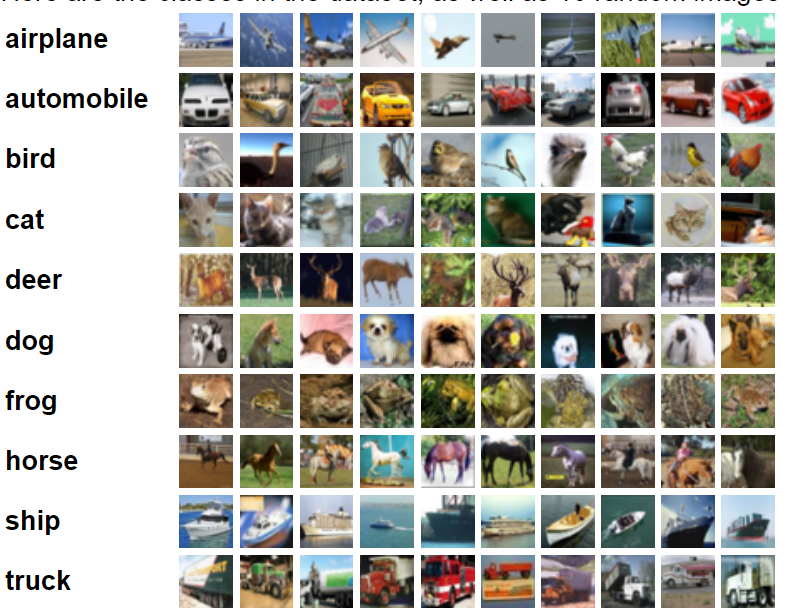

In [4]:
# Getting data set and understanding how many datapoints it have. 
# load from keras.datasets import cifar 10 , cifar1000, mnist, or fashion_mnist,
# Keras provided load_data() method to get dataset in splits.
from keras.datasets import cifar10 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [ ]:
# print the shape of x_train, y_train for training samples
# print the shape of x_test , y_test for test samples

In [ ]:
# Make a dictionary labels using the labels defined in the CIFAR10. (See above)

In [3]:
# show a sample from training data at index 0 using plt.imshow()
import matplotlib.pyplot as plt

In [1]:
# What is the label at index 0? Is it a number corresponding to the class?


In [2]:
# Use the label dictionary to show that class it actually contains?

In [5]:
# Get 10 random number to draw the samples Hint: np.random.randint()


In [ ]:
plt.figure(figsize=(10, 10))
for i in range(0,9):
    ax = plt.subplot(3, 3, i + 1)
    #Missing code: for plt.imshow() on training samples using random numbers from previous samples
    # Missing code: for label corresponding to the sample training sample
    plt.axis("off")

</br>Noramlization improves training performs helps to reduce the digits size during the multiplication and addition operations.
</br>Images are normally 0-255 so we can normalize them to 0-1.
Note: Convert the pixel values by diving with 255 but before convert the pixel values to float32 (Remember: astype())

In [ ]:
# Convert Xtrain and Xtest to float32.

# Now divide both of them by 255.


# Transforming labels
If you have text labels they need to converted into the numbers first. We can’t just give the categorical data to the machine for processing. So, we need to do some steps to make the data more processable for the machine.

One-hot encoding provides label in vector form of 0,1. It helps to do better predictions. 
One-hot is a group of bits among which the legal combinations of values are only those with a single high bit and all the others low. 

(Hint from kera.utils use np_utils and to_categorical)


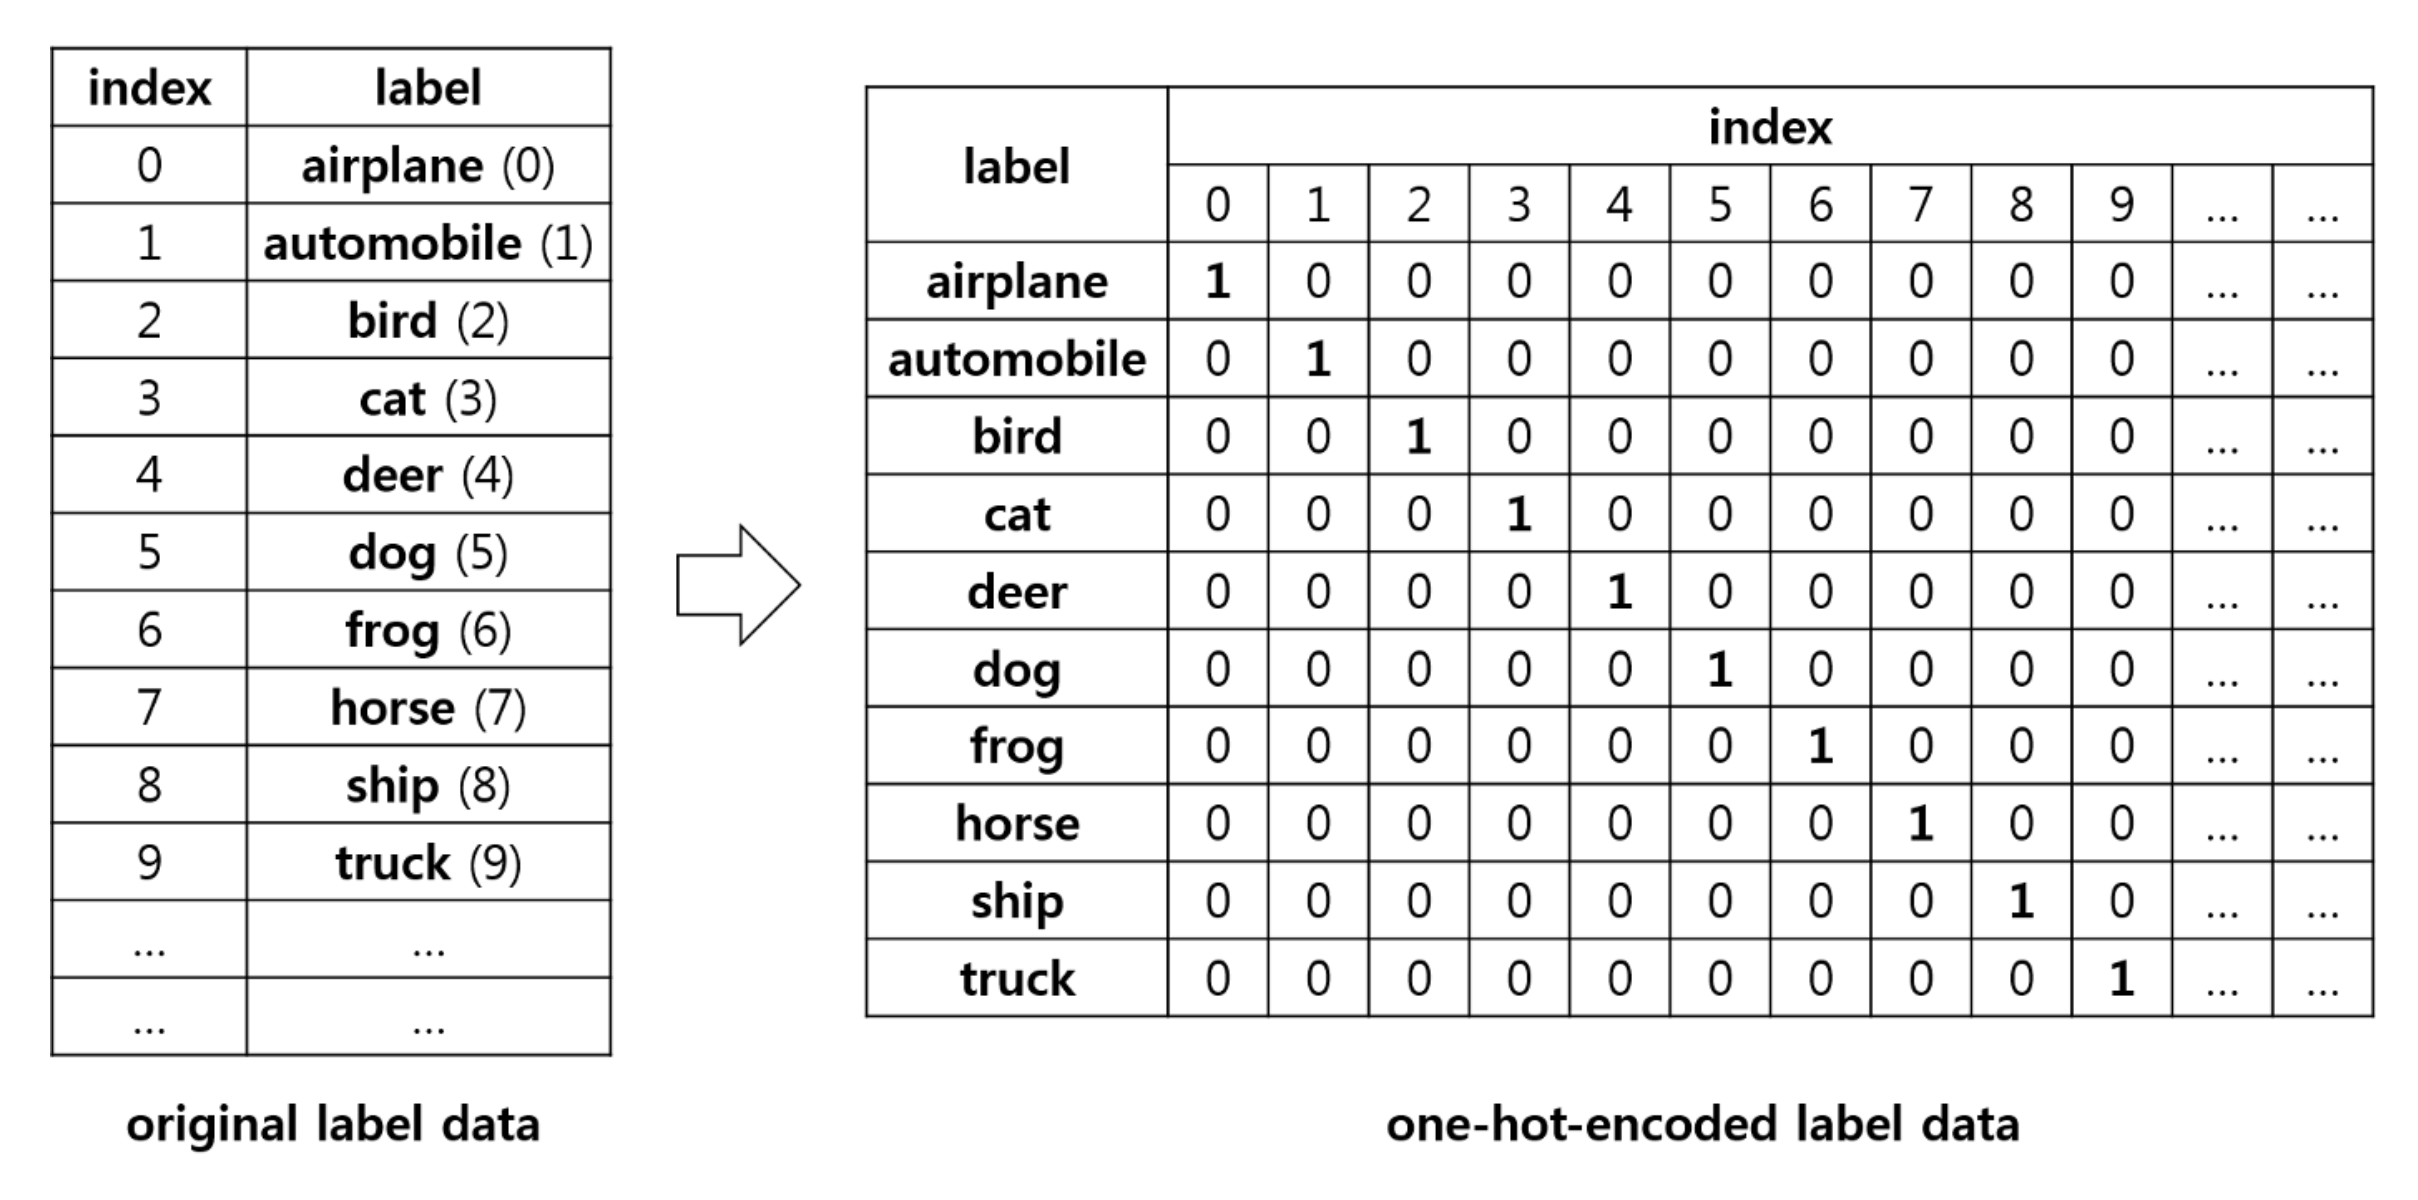

In [ ]:
from keras.utils.np_utils  import to_categorical
y_train = to_categorical(y_train, num_classes=None) 
y_test = to_categorical(y_test, num_classes=None) 

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
num_classes = y_train.shape[1]

Now the labels are converted into binary matrices of width 10 (similar to the total classes) 



# Creating a model

You can use sequential from keras.models to pack a model with different layers or import available CNN architecture.
In a model, we need to define input and output layer size. 

For existing architectures: https://keras.io/api/applications/

</br> for this lab we will focus on a small architecture MobileNet

[Picture Ref: https://medium.com/analytics-vidhya/image-classification-with-mobilenet-cc6fbb2cd470]

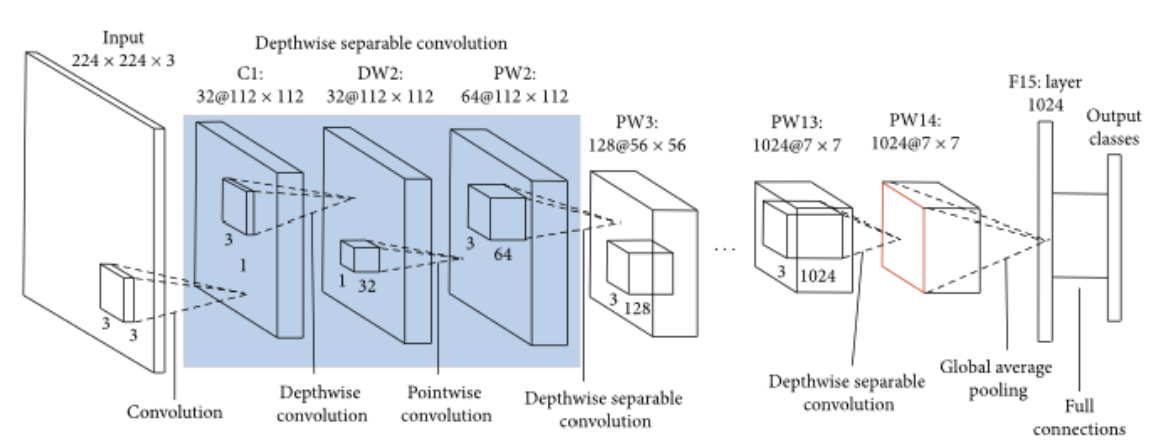

In [ ]:
# Define your own model
# from keras.models import Sequential
# from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

# model = sequential()
# model.add(Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu', padding='same')) 
# model.add(Dropout(0.2)) 
# model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) 
# model.add(MaxPooling2D(pool_size=(2, 2))) 
# model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
# model.add(Dropout(0.2)) 
# model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
# model.add(MaxPooling2D(pool_size=(2, 2))) 
# model.add(Conv2D(128, (3, 3), activation='relu', padding='same')) 
# model.add(Dropout(0.2)) 
# model.add(Conv2D(128, (3, 3), activation='relu', padding='same')) 
# model.add(MaxPooling2D(pool_size=(2, 2))) 
# model.add(Flatten()) 
# model.add(Dropout(0.2)) 
# model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3))) 
# model.add(Dropout(0.2)) 
# model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3))) 
# model.add(Dropout(0.2)) 
# model.add(Dense(num_classes, activation='softmax'))

For transfer learning and finetuning you can use ImageNet

In [ ]:
base_model = keras.applications.MobileNet(weights=None, input_shape=(32,32,3), classes=num_classes, include_top=True, classifier_activation="softmax") 
# Do no include ImageNet classifier if inlcude_top = false
# Softmax classifier gives probablities

In [ ]:
base_model.summary()

Now, after creating/selecting a model with particular input and output type. We need to choose optimizer from (https://keras.io/api/optimizers/) and a from loss fuction (https://keras.io/api/losses/).

An optimizer is one of the two arguments required for compiling a Keras model, it shapes and molds your model into its most accurate possible form by futzing with the weights.

The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.

In [ ]:
learning_rate = 0.001
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=False) # from_logits is true when output of model is not probability but a logit(number)
optimizer = keras.optimizers.SGD(lr= learning_rate)

Compile the model before training it. We have compile() method in keras.

In [ ]:
# keras.metrics to get more evaluation metrics
base_model.compile(loss=loss_fn, optimizer=optimizer, metrics=['accuracy'])

# Training
It is time to make the model learn from our data and validate it on hold-out set(test set in our case).
We need to select the hyperparameters: epoch and batch_size.

<b>epoch:</b> indicates the number of passes of the entire training dataset the machine learning algorithm has completed.

<b>batch_size:</b> the number of training examples utilized in one iteration

In [ ]:
epoch = 20
# callback = [tf.keras.callbacks.EarlyStopping(patience=2)] # ModelCheckpoint(filepath="")
log = base_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epoch, batch_size=64)

In [ ]:
x = list(range(epoch))
y = log.history['accuracy']
z = log.history['val_accuracy']

plt.plot(x,y,'r', label = "Training")
plt.plot(x,z,'b', label = "Validation")
plt.legend()

In [ ]:
# Final evaluation of the model on test set. 
scores = base_model.evaluate(X_test, y_test, verbose=1) 
print("Accuracy: %.2f%%" % (scores[1]*100))

we chose certain values for learning rate and epochs. you can play with these hyperparamters to get higher prediction accuracy.  

# Evaluating the model
Use the three example picture. Upload them on colab or load it from google drive if you have already connected it. 

Also use three random pictures from test set. Plot them first and get their prediction from the model. 

In [ ]:
# External pictures
import numpy as np 
from keras.preprocessing import image
img_path = '/content/test3.jpg'
test_image1 =image.load_img(img_path, target_size =(32,32))
plt.imshow(test_image1)

test_image = image.img_to_array(test_image1) 
test_image =np.expand_dims(test_image, axis =0) 

In [ ]:
# prediction of the model are probabilities in each class. Higher probability means model is more confident for that particular label.
result = base_model.predict(test_image) 
result

In [ ]:
# To get a position where we have highest probability
result = np.argmax(result)
result

2

In [ ]:
# Label corresponding to 
predicted_label = labels[result]
predicted_label

'bird'

# Save the trained model weights for future use.


In [ ]:
base_model.save('my_model.h5')

In [ ]:
#loading the saved model 
from keras.models import load_model 
path = 'my_model.h5'
model = load_model(path)